# Titanic Competition - EDA - Ramin F.

In this notebook we are going to explore the data and perform all the steps before Modeling in CRISP-DM methodology. In this competition the goal is to predict whether if passengers were survived or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 200)
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('darkgrid')

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


as you can see there are some features that requires further explanation, we will discuss them further:
- Pclass: this feature specificy the socio-economic status. this feature is discrete and has 3 classes:
    - 1: Upper Class
    - 2: Middle Class
    - 3: Lower Class
- Age: the age in this dataset is fractional, since there are passenger with less than a year age.
- SibSp: Number of sibling / spouses abroad the titanic.
- Parch: Number of parents / children abroad the titanic.
- Embarked: Port of embarkation. this feature is discrete and has 3 classes:
    - C: Cherbourg
    - Q: Queenstown
    - S: Southampton

In [3]:
print(f'This dataset has {train.shape[0]} Records and {train.shape[1]} features.')

This dataset has 891 Records and 12 features.


## Descriptive Analysis
First thing first, lets check the descreptive analysis of this data set.

In [4]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.00,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN


Let's check grouped descriptive analysis:

In [5]:
train.groupby('Survived').mean().drop(['PassengerId', 'SibSp', 'Parch'], axis=1)

,Pclass,Age,Fare
Survived,,,
0,2.53,30.63,22.12
1,1.95,28.34,48.40


in the cell above you can see the average of Passenger Class, Age and Fare Features in contrast survived and not survived groups.
this output clearly shows that most of people with lower class ticket didn't survive.

In [6]:
train.groupby('Pclass').mean().drop(['PassengerId', 'SibSp', 'Parch'], axis=1)

,Survived,Age,Fare
Pclass,,,
1,0.63,38.23,84.15
2,0.47,29.88,20.66
3,0.24,25.14,13.68


in the cell above you can see the average of Survival Status, Age and Fare Features in contrast Passenger Classes.
this output clearly indicates that:
- majority of the highest class survived, their fare was much more expensive than lower classes and they were older than the other 2 classes.
- a little less than half of the middle-class passengers survived and their average age was about 29 years old.
- majority of low-class passengers didn't survive and their average age was 25 years old.

In [7]:
train.groupby('Sex').mean().drop(['PassengerId', 'SibSp', 'Parch'], axis=1)

,Survived,Pclass,Age,Fare
Sex,,,,
female,0.74,2.16,27.92,44.48
male,0.19,2.39,30.73,25.52


in the cell above you can see the average of Survival Status, Age, Fare and Passenger class Features in contrast of Sex.
this output clearly indicates that:
- majority of females survived and females tend to have more expensive tickets than men.
- majority of men didn't survive and their tickets were cheaper.

In [8]:
train.groupby('Embarked').mean().drop(['PassengerId', 'SibSp', 'Parch'], axis=1)

,Survived,Pclass,Age,Fare
Embarked,,,,
C,0.55,1.89,30.81,59.95
Q,0.39,2.91,28.09,13.28
S,0.34,2.35,29.45,27.08


in the cell above you can see the average of Survival Status, Age, Fare and Passenger class Features in contrast of Embarked City.
this output clearly indicates that:
- Passengers who boarded Cherbourg city were in higher class, thus they survived.
- Passengers from Queenstown were in lower classes.
- majority of Passengers who were boarded in Southampton didn't Survive.

## Missing Values
now it's time to check if there are any missing values in dataset, this is an important step since if we will have missing values, we must choose a strategy to tackle that problem.

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

as you can see in the cell above, there are 177 records with missing age and 2 records with missing embarked feature. also there are 687 rows with missing values in "Cabin" feature but since that feature is not useful for ML model, and we will drop it, it doesn't matter.

## Outlier Treatment
with a quick glimpse to the descriptive analysis section we can understand that there are outliers with huge difference in "Fare" feature, in this section we are going to investigate it more and remedy them with "Clipping" solution.

In [10]:
train['Fare'][train['Fare'] > train['Fare'].quantile(.99)]

27    263.00
88    263.00
258   512.33
311   262.38
341   263.00
438   263.00
679   512.33
737   512.33
742   262.38
Name: Fare, dtype: float64

as you can see in the cell above, there are 9 records (out of 891) in which their "Fare" feature is greater than 99% of the dataset. The interesting thing here is 3 records have 512 as "Fare" feature which is more than 99.775% of dataset. This seems like a typo or an error from data side. these 3 records can be see below:

In [11]:
train.loc[[258, 679, 737],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.33,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,512.33,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.33,B101,C


as we said earlier its like a random error in data side. we will clip this 3 records "Fare" feature to second to max value in this feature, i.e 263, which is more frequent.

In [12]:
train.loc[[258, 679, 737],'Fare'] = 263
train.loc[[258, 679, 737],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,263.00,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,263.00,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,263.00,B101,C


## Graphical Representations
in this section we are going to explore the dataset further with some of useful data visualizations.

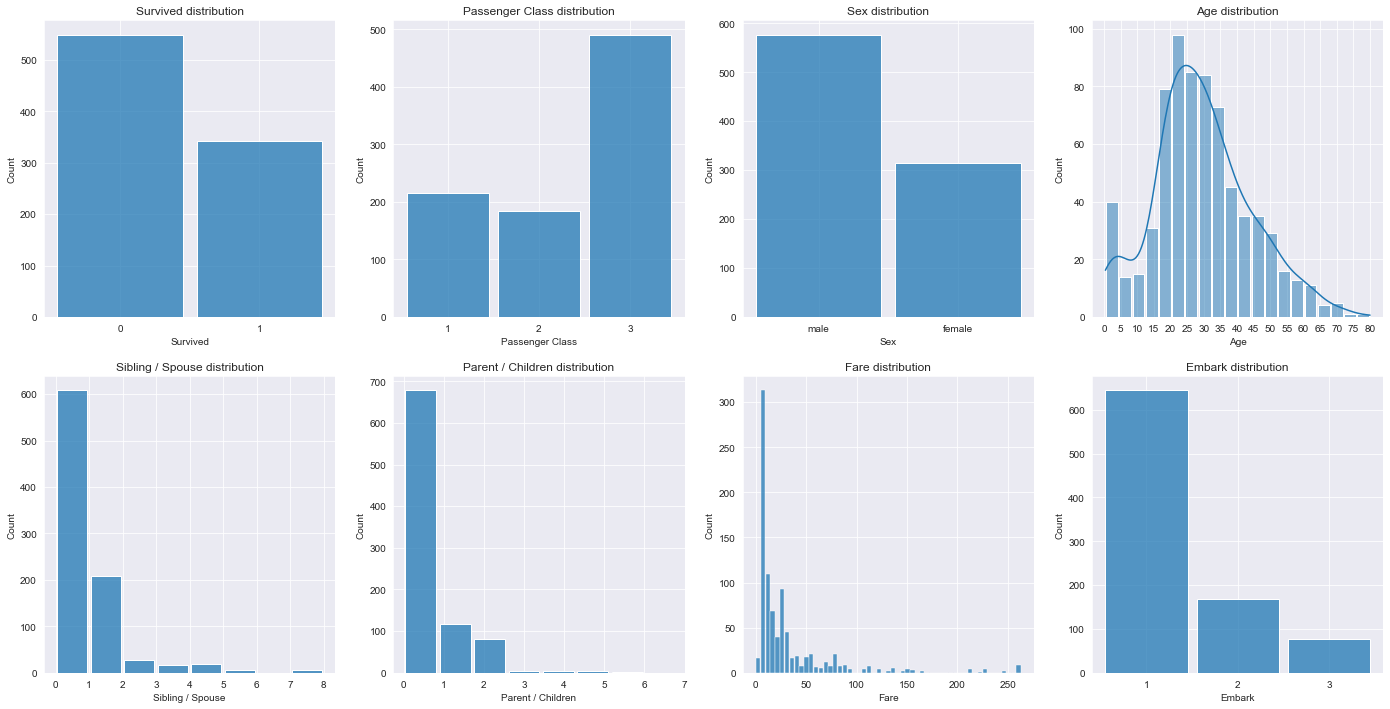

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(24,12))

sns.histplot(data=train, x='Survived', bins=2, shrink=.9, ax=axes[0, 0], discrete=True)
axes[0, 0].set_title('Survived distribution')
axes[0, 0].set_xlabel('Survived')
axes[0, 0].set_xticks([0, 1])

sns.histplot(data=train, x='Pclass', bins=3, shrink=.9, ax=axes[0, 1], discrete=True)
axes[0, 1].set_title('Passenger Class distribution')
axes[0, 1].set_xlabel('Passenger Class')
axes[0, 1].set_xticks([1, 2, 3])

sns.histplot(data=train, x='Sex', bins=2, shrink=.9, ax=axes[0, 2], discrete=True)
axes[0, 2].set_title('Sex distribution')
axes[0, 2].set_xlabel('Sex')

sns.histplot(data=train, x='Age', bins=20, shrink=.9, ax=axes[0, 3], kde=True)
axes[0, 3].set_title('Age distribution')
axes[0, 3].set_xlabel('Age')
axes[0, 3].set_xticks(range(0, 80 + 1, 5))

sns.histplot(data=train, x='SibSp', bins=8, shrink=.9, ax=axes[1, 0])
axes[1, 0].set_title('Sibling / Spouse distribution')
axes[1, 0].set_xlabel('Sibling / Spouse')
axes[1, 0].set_xticks(range(0, 8 + 1, 1))

sns.histplot(data=train, x='Parch', bins=7, shrink=.9, ax=axes[1, 1])
axes[1, 1].set_title('Parent / Children distribution')
axes[1, 1].set_xlabel('Parent / Children')
axes[1, 1].set_xticks(range(0, 7 + 1, 1))

sns.histplot(data=train, x='Fare', shrink=.9, ax=axes[1, 2])
axes[1, 2].set_title('Fare distribution')
axes[1, 2].set_xlabel('Fare')

temp = train.copy()
temp['Embarked'][temp['Embarked'] == 'S'] = 1
temp['Embarked'][temp['Embarked'] == 'C'] = 2
temp['Embarked'][temp['Embarked'] == 'Q'] = 3
sns.histplot(data=temp, x='Embarked', bins=3, shrink=.9, ax=axes[1, 3], discrete=True)
axes[1, 3].set_title('Embark distribution')
axes[1, 3].set_xlabel('Embark')
axes[1, 3].set_xticks([1,2,3])

plt.show()

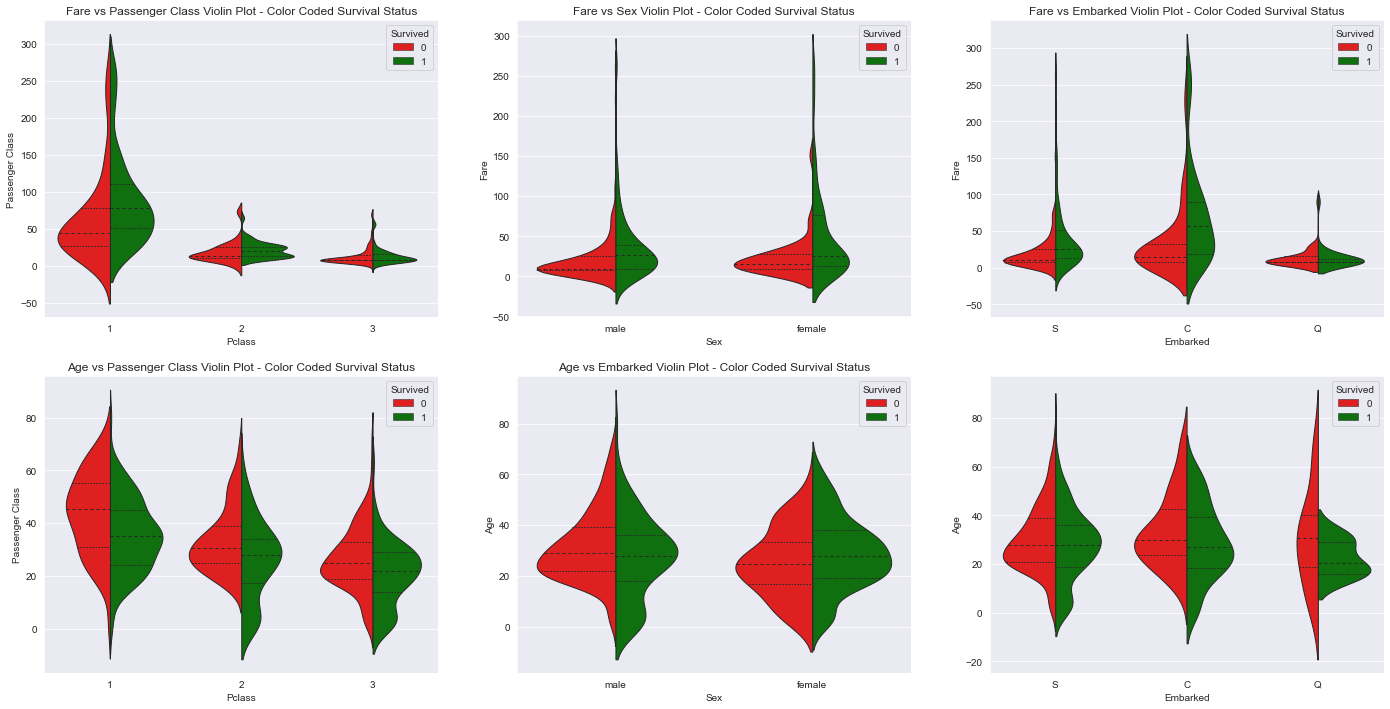

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(24,12))

sns.violinplot(data=train, x="Pclass", y="Fare", hue="Survived",
               split=True, inner="quart", linewidth=1,
               palette={0: "r", 1: "g"}, ax=axes[0, 0])
axes[0, 0].set_title('Fare vs Passenger Class Violin Plot - Color Coded Survival Status')
axes[0, 0].set_ylabel('Passenger Class')

sns.violinplot(data=train, x="Sex", y="Fare", hue="Survived",
               split=True, inner="quart", linewidth=1,
               palette={0: "r", 1: "g"}, ax=axes[0, 1])
axes[0, 1].set_title('Fare vs Sex Violin Plot - Color Coded Survival Status')

sns.violinplot(data=train, x="Embarked", y="Fare", hue="Survived",
               split=True, inner="quart", linewidth=1,
               palette={0: "r", 1: "g"}, ax=axes[0, 2])
axes[0, 2].set_title('Fare vs Embarked Violin Plot - Color Coded Survival Status')

sns.violinplot(data=train, x="Pclass", y="Age", hue="Survived",
               split=True, inner="quart", linewidth=1,
               palette={0: "r", 1: "g"}, ax=axes[1, 0])
axes[1, 0].set_title('Age vs Passenger Class Violin Plot - Color Coded Survival Status')
axes[1, 0].set_ylabel('Passenger Class')

sns.violinplot(data=train, x="Sex", y="Age", hue="Survived",
               split=True, inner="quart", linewidth=1,
               palette={0: "r", 1: "g"}, ax=axes[1, 1])
axes[1, 1].set_title('Age vs Sex Violin Plot - Color Coded Survival Status')

sns.violinplot(data=train, x="Embarked", y="Age", hue="Survived",
               split=True, inner="quart", linewidth=1,
               palette={0: "r", 1: "g"}, ax=axes[1, 2])
axes[1, 1].set_title('Age vs Embarked Violin Plot - Color Coded Survival Status')

plt.show()

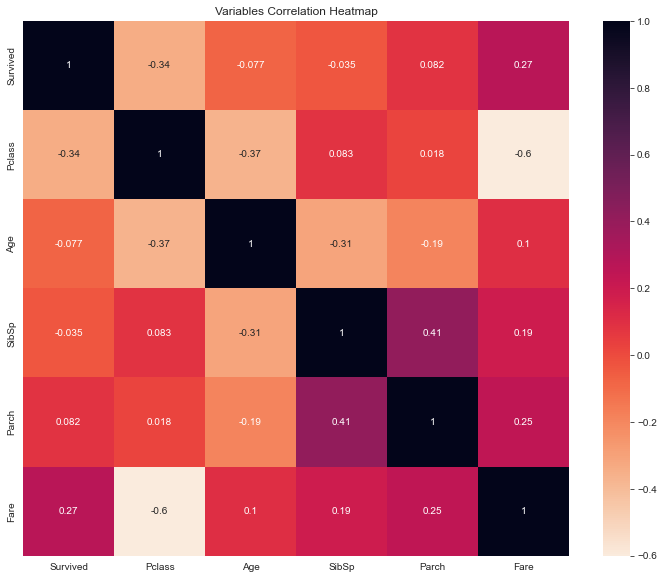

In [15]:
intercor = train.drop(['PassengerId'], axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(intercor,annot=True, cmap = 'rocket_r')
plt.tight_layout()
plt.title('Variables Correlation Heatmap')
plt.show()

In the cell above you can see the correlation between the variables in this dataset.
there are some interesting facts which can be deduce from this graph:
- Survival status and Passenger class variables have mediocre negative correlation. higher class, means higher chance of survival.
- Passenger Class and Age variables have mediocre negative correlation. old passengers was in higher classes.
- Passenger class and Fare variables have a strong negative correlation and it's obvious. higher class tickets were more expensive than lower class tickets.

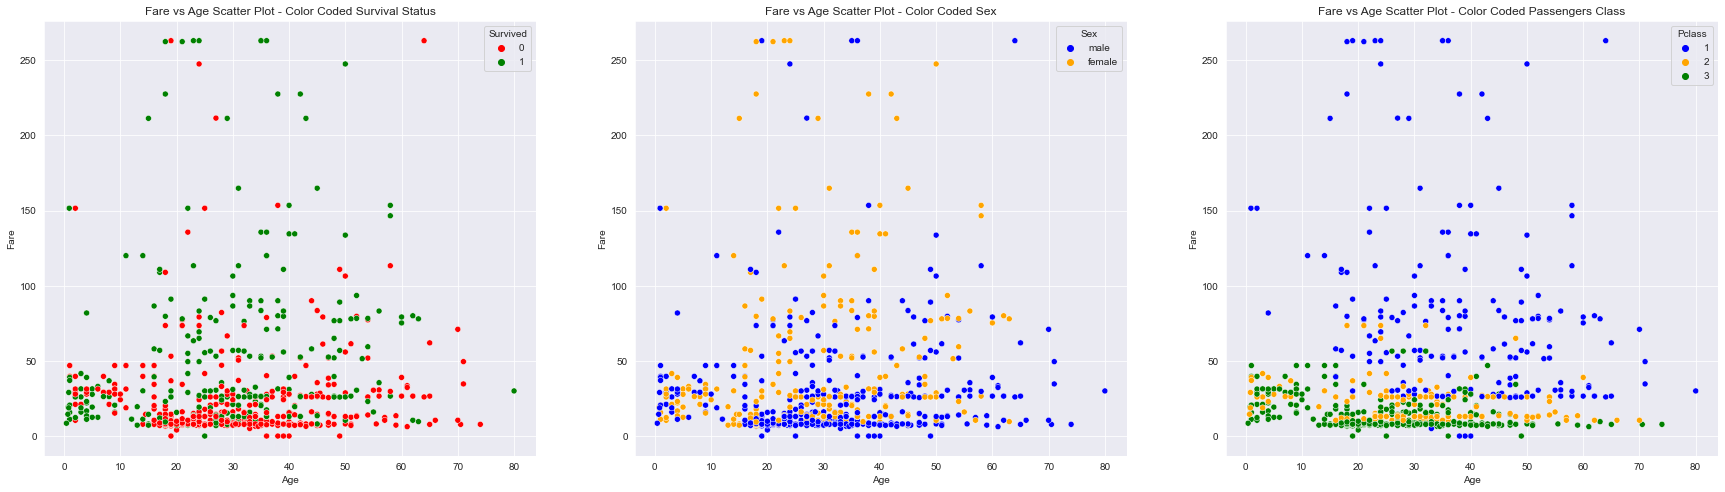

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(30,8))

sns.scatterplot(data=train, x='Age', y='Fare', hue='Survived', palette={0:'r', 1:'g'}, ax=axes[0])
axes[0].set_title('Fare vs Age Scatter Plot - Color Coded Survival Status')
sns.scatterplot(data=train, x='Age', y='Fare', hue='Sex', palette={'female':'orange', 'male':'b'}, ax=axes[1])
axes[1].set_title('Fare vs Age Scatter Plot - Color Coded Sex')
sns.scatterplot(data=train, x='Age', y='Fare', hue='Pclass', palette={1:'b', 2:'orange', 3:'g'}, ax=axes[2])
axes[2].set_title('Fare vs Age Scatter Plot - Color Coded Passengers Class')

plt.show()

in the graph above you can see the scatter plot of Fare in contrast of Age, color coded with survival status, sex and passenger's class.
as you can see younger passengers had lowest fares and highest chance of survival. also people with higher fare prices tend to have more chance of survival in contrast of people with lower ticket's price.

----
# Notebook By. Ramin F. | @SimplyRamin